# Multi-class Classification Problem

# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
# For processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

In [5]:
df = pd.read_csv('train.csv')
df=df.drop('Unnamed: 0',axis=1)
df.shape

(7352, 566)

In [6]:
df.columns

Index(['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       ...
       'v556', 'v557', 'v558', 'v559', 'v560', 'v561', 'v562', 'v563', 'v564',
       'label'],
      dtype='object', length=566)

In [7]:
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,f,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,A,0.288585,-0.913526,-0.020294,2
1,1,f,-0.123520,-0.998245,-0.975300,0,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.732626,0.703511,-0.844788,0.180289,-0.054317,A,0.278419,-0.960322,-0.016411,2
2,2,f,-0.113462,-0.995380,-0.967187,0,-0.996520,-0.963668,-0.977469,-0.938692,...,0.100699,0.808529,-0.848933,0.180637,-0.049118,A,0.279653,-0.978944,-0.019467,2
3,3,f,-0.123283,-0.996091,-0.983403,0,-0.997099,-0.982750,-0.989302,-0.938692,...,0.640011,-0.485366,-0.848649,0.181935,-0.047663,A,0.279174,-0.990675,-0.026201,2
4,4,f,-0.115362,-0.998139,-0.980817,0,-0.998321,-0.979672,-0.990441,-0.942469,...,0.693578,-0.615971,-0.847865,0.185151,-0.043892,A,0.276629,-0.990482,-0.016570,2


In [8]:
df_test = pd.read_csv('test.csv')
df_test=df_test.drop('Unnamed: 0',axis=1)
df_test.shape

(2947, 566)

In [9]:
df_test.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,i,-0.014654,-0.938404,-0.920091,0,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.825886,0.271151,-0.720009,0.276801,-0.057978,B,0.257178,-0.667683,-0.023285,2
1,1,h,-0.119083,-0.975415,-0.967458,0,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.434375,0.920593,-0.698091,0.281343,-0.083898,B,0.286027,-0.944958,-0.013163,2
2,2,h,-0.118152,-0.993819,-0.969926,0,-0.994403,-0.970735,-0.963483,-0.939260,...,0.064103,0.145068,-0.702771,0.280083,-0.079346,B,0.275485,-0.962748,-0.026050,2
3,3,f,-0.117520,-0.994743,-0.973268,0,-0.995274,-0.974471,-0.968897,-0.938610,...,0.340134,0.296407,-0.698954,0.284114,-0.077108,B,0.270298,-0.967091,-0.032614,2
4,4,e,-0.129527,-0.993852,-0.967445,0,-0.994111,-0.965953,-0.977346,-0.938610,...,0.736715,-0.118545,-0.692245,0.290722,-0.073857,B,0.274833,-0.978295,-0.027848,2


So, there is label feature as well. It means that this dataset is more of validation dataset to test how my model performed versus what test dataset has.

Mostly test dataset are out of sample with no target value at all. 

# 3)- Data Exploring

### 3.1)- Check data type

In [10]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
v0,int64
v5,int64
label,int64
v3,float64
v386,float64
...,...
v193,float64
v187,float64
v282,float64
v561,object


We have too many columns to observe. It is unwise to look and assume that all variables are int or float. Some exploration is needed

In [11]:
df.v1.dtype

dtype('O')

So we have an object. Lets see what it contains

In [12]:
df.v1[:5]

0    f
1    f
2    f
3    f
4    f
Name: v1, dtype: object

What are these "f"? Are they classes or categories ?

In [13]:
df.v1.value_counts()

d    1407
f    1374
e    1286
g    1226
i    1073
h     986
Name: v1, dtype: int64

Yes it seems like that these are classess. There is no information what do they mean or what even features mean? We shall try to deal with them as categorical variables are dealt

**Problem is that this dataset has too much to see and one by one exploration is not possible**

### 3.2 Check Data Description

In [14]:
df.describe()

,v0,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v555,v556,v557,v558,v559,v560,v562,v563,v564,label
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7351.000000,7352.000000,7345.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,3675.500000,-0.109141,-0.605438,-0.510938,0.0,-0.630512,-0.526907,-0.606191,-0.468604,-0.305875,...,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,0.274488,-0.604754,-0.017695,2.315152
std,2122.483922,0.056635,0.448734,0.502645,0.0,0.424073,0.485942,0.414135,0.544547,0.282282,...,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,0.070261,0.418687,0.040811,1.690628
min,0.000000,-1.000000,-1.000000,-0.999873,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1837.750000,-0.120993,-0.992754,-0.978129,0.0,-0.993591,-0.978162,-0.980252,-0.936219,-0.563530,...,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,0.262975,-0.980233,-0.024863,1.000000
50%,3675.500000,-0.108676,-0.946196,-0.851897,0.0,-0.950709,-0.857328,-0.857244,-0.881637,-0.479508,...,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,0.277193,-0.859365,-0.017219,2.000000
75%,5513.250000,-0.097794,-0.242813,-0.034231,0.0,-0.292680,-0.066701,-0.265598,-0.017129,-0.065161,...,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,0.288461,-0.262415,-0.010783,4.000000
max,7351.000000,1.000000,1.000000,0.916238,0.0,1.000000,0.967664,1.000000,1.000000,1.000000,...,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,1.000000,1.000000,1.000000,5.000000


We can find very quickly what are minimum values and what are maximum values. This gives us idea about peak and dip point irrespective of units. As these features are not known so, we cannot find any description out of them or any statistic analysis.

### 3.3)- Check categorical variables

In [15]:
df.describe(include=['object', 'bool'])

,v1,v561
count,7352,7352
unique,6,21
top,d,Y
freq,1407,409


In [16]:
df.v561.dtype

dtype('O')

Here we found one more interesting variable.What is it in terms of data type? Is it int, object or what?

In [17]:
df.v561.value_counts()

Y     409
U     408
Z     392
AD    383
AB    382
AA    376
W     372
Q     368
P     366
S     360
A     347
AC    344
C     341
O     328
F     325
N     323
V     321
K     316
G     308
E     302
H     281
Name: v561, dtype: int64

These values are also categories 

In [18]:
# Checking for double check
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

v1       6
v561    21
dtype: int64

### 3.4)- Encode categorical feature 


In [19]:
v = pd.get_dummies(df.v1, sparse=True)
v

,d,e,f,g,h,i
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
7347,0,0,0,0,0,1
7348,0,0,0,0,0,1
7349,0,0,0,0,0,1
7350,0,0,0,0,0,1


In [20]:
x = pd.get_dummies(df.v561, sparse=True)
x

,A,AA,AB,AC,AD,C,E,F,G,H,...,N,O,P,Q,S,U,V,W,Y,Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7348,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7349,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7350,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df=pd.get_dummies(df,columns=['v1'], drop_first=True)
df=pd.get_dummies(df,columns=['v561'], drop_first=True)

In [22]:
df.shape

(7352, 589)

### 3.5)- Missing values

In [23]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  7352
No. of missing fields:  7


,No. of mising Value,%age of missing Value
v15,20,0.3
v14,19,0.3
v11,16,0.2
v13,12,0.2
v10,7,0.1
v12,5,0.1
v17,4,0.1


In [24]:
df.v3[:5]

0   -0.995279
1   -0.998245
2   -0.995380
3   -0.996091
4   -0.998139
Name: v3, dtype: float64

There are some missing values and we need to solve this problem

In [25]:
df.v17[:5]

0   -0.999863
1   -0.999788
2   -0.999660
3   -0.999736
4   -0.999856
Name: v17, dtype: float64

In [26]:
df.loc[df.isnull().sum()]

,v0,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v561_N,v561_O,v561_P,v561_Q,v561_S,v561_U,v561_V,v561_W,v561_Y,v561_Z
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0


In [27]:
col_mask=df.isnull().any(axis=0) 

In [28]:
row_mask=df.isnull().any(axis=1)

In [29]:
df.loc[row_mask,col_mask]

,v8,v10,v11,v12,v13,v14,v15,v16,v17,v18
85,-0.204493,-0.102134,-0.176986,0.094155,0.109592,NaN,-0.101385,-0.714917,-0.782954,-0.716864
86,-0.095763,-0.145546,-0.193157,0.280536,-0.023057,NaN,-0.148596,-0.789177,-0.813002,-0.656698
87,-0.233326,-0.173889,-0.126654,0.280536,-0.023057,NaN,-0.106409,-0.727085,-0.760976,-0.718639
120,-0.277213,0.084098,-0.099875,0.094599,0.025585,NaN,-0.235228,-0.799426,-0.835261,-0.753874
128,-0.318214,-0.034024,-0.372518,0.210398,-0.228288,NaN,-0.105281,-0.623365,-0.752514,-0.798732
...,...,...,...,...,...,...,...,...,...,...
7033,-0.990474,-0.545385,NaN,0.838980,0.669255,0.844922,-0.989612,-0.999909,-0.999696,-0.999810
7037,-0.993809,-0.568640,NaN,0.848479,0.693304,0.844290,-0.995626,-0.999952,-0.999977,-0.999890
7085,-0.213152,-0.218644,-0.281534,0.343670,0.268251,0.290204,NaN,-0.837644,-0.893945,-0.684714
7095,-0.180210,-0.112970,-0.297452,0.329200,0.293539,NaN,-0.261934,-0.824597,-0.883758,-0.691359


These are rows that are supposed to have missing values. But, they do not have any missing data.

We sometimes expect "NaN" written for missing data but, there are other issues like infite value problem. So, I ll try to implement all those trouble shooting methods one by one

##### getting rid of infinite values.

In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

##### To fill values with mean as we have some outlier situation

In [31]:
df.fillna(df.mean(), inplace=True)

I tried couple of other techniques like imputer or feature by feature filling mean values.

In [32]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(df)

In [33]:
#df['v15'].fillna((df['v15'].mean()), inplace=True)
#df['v14'].fillna((df['v14'].mean()), inplace=True)
#df['v11'].fillna((df['v11'].mean()), inplace=True)
#df['v13'].fillna((df['v13'].mean()), inplace=True)
#df['v10'].fillna((df['v10'].mean()), inplace=True)
#df['v12'].fillna((df['v12'].mean()), inplace=True)
#df['v17'].fillna((df['v17'].mean()), inplace=True)

In [34]:
summary_missing(df)

No. of fields:  7352
No. of missing fields:  0


,No. of mising Value,%age of missing Value


So, there are no missing values.

### 3.5)- Duplicate values

In [35]:
df.duplicated().sum()

0

None found, so no action needed.

### 3.6)-Outliers

In [36]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with v8 variable
x = _zoom_3sigma('v0', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -2691.95
High value: 10042.95


There is huge variation in low and high value. So, we have tendency of outliers in our data. I ll get to solution of this issue. But, I need to first check my target variable.

### 3.7)- Target variable

Let's explore target variable

In [37]:
df.label.dtype

dtype('int64')

**1st up there is a problem. Label is also categorical variable but, it is encoded as int.We need to fix it.**

In [38]:
df['label']=df['label'].astype('category')
df_test['label']=df_test['label'].astype('category')

In [39]:
df.label.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

In [40]:
df_test.label.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

In [41]:
df.label.value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: label, dtype: int64

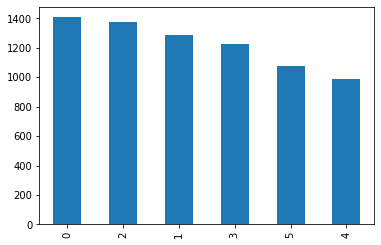

In [42]:
df.label.value_counts().plot.bar()

So, all is set. We have our training data cleaned.

# 4)- Pre-Modeling process

In [43]:
y=df['label']

In [44]:
X=df.drop(['label'], axis=1)

In [45]:
print(y.shape)
print(X.shape)

(7352,)
(7352, 588)


### 4.1)- PCA

In [46]:
scaler = StandardScaler()
def transform_data(scaler, df, columns):
    transformed_data = scaler.transform(X[columns])
    df_transformed = pd.DataFrame(transformed_data, columns=columns)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]

### 4.2)-Normalize data

By this step, we can also minimize our **outlier** problem

In [47]:
X_scaled=scaler.fit(X)

In [48]:
X_scaled

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
transform_data(scaler, X, X.columns)

In [52]:
X_pca = X.copy()

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90) # to get 95% of variance

In [54]:
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# No. of PCA Components
print ('Variance: ', pca.n_components)
print ('No. of components to keep: ', pca.n_components_)

Variance:  0.9
No. of components to keep:  76


### apply pca

In [56]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(X[columns])
    
    tcols = []
    for i in range(pca.n_components_):       
        tcols.append('component_' + str(i))
    
    print ('components:',tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

In [57]:
transform_with_pca(pca,X_pca,X_pca.columns)

components: ['component_0', 'component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10', 'component_11', 'component_12', 'component_13', 'component_14', 'component_15', 'component_16', 'component_17', 'component_18', 'component_19', 'component_20', 'component_21', 'component_22', 'component_23', 'component_24', 'component_25', 'component_26', 'component_27', 'component_28', 'component_29', 'component_30', 'component_31', 'component_32', 'component_33', 'component_34', 'component_35', 'component_36', 'component_37', 'component_38', 'component_39', 'component_40', 'component_41', 'component_42', 'component_43', 'component_44', 'component_45', 'component_46', 'component_47', 'component_48', 'component_49', 'component_50', 'component_51', 'component_52', 'component_53', 'component_54', 'component_55', 'component_56', 'component_57', 'component_58', 'component_59', 'component_60', 'component_61', 'comp

['component_0',
 'component_1',
 'component_2',
 'component_3',
 'component_4',
 'component_5',
 'component_6',
 'component_7',
 'component_8',
 'component_9',
 'component_10',
 'component_11',
 'component_12',
 'component_13',
 'component_14',
 'component_15',
 'component_16',
 'component_17',
 'component_18',
 'component_19',
 'component_20',
 'component_21',
 'component_22',
 'component_23',
 'component_24',
 'component_25',
 'component_26',
 'component_27',
 'component_28',
 'component_29',
 'component_30',
 'component_31',
 'component_32',
 'component_33',
 'component_34',
 'component_35',
 'component_36',
 'component_37',
 'component_38',
 'component_39',
 'component_40',
 'component_41',
 'component_42',
 'component_43',
 'component_44',
 'component_45',
 'component_46',
 'component_47',
 'component_48',
 'component_49',
 'component_50',
 'component_51',
 'component_52',
 'component_53',
 'component_54',
 'component_55',
 'component_56',
 'component_57',
 'component_58',
 'compo

In [58]:
print(pca.components_)

[[-4.19653992e-03 -1.52557346e-03  5.61347745e-02 ...  3.10224656e-03
  -3.42554966e-03 -2.38652493e-03]
 [-7.08764909e-03 -3.81561544e-03 -1.10592822e-02 ...  2.22184866e-02
  -3.11684914e-02  6.21298587e-03]
 [ 1.61552665e-02  9.48063308e-03 -2.69406466e-02 ...  5.54907076e-02
   1.05077563e-04 -1.13398059e-02]
 ...
 [ 1.30684259e-02 -1.18196205e-04  5.46195231e-04 ... -1.23125794e-01
   1.64533432e-01  1.60211572e-01]
 [ 3.33940623e-02 -1.07912798e-01 -1.00974073e-02 ...  8.83668124e-03
  -1.41507168e-02  1.18549003e-01]
 [ 7.81083923e-03 -3.98652362e-02 -1.16603889e-02 ...  3.31952430e-02
   1.57982432e-01 -1.46663881e-02]]


In [59]:
X_pca.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,component_66,component_67,component_68,component_69,component_70,component_71,component_72,component_73,component_74,component_75
0,-16.175307,2.167266,3.040405,-0.157464,6.847707,-3.449790,-2.338293,5.595929,-0.360816,-3.771317,...,1.184391,-0.841281,1.412309,1.117183,1.342270,-0.529419,1.786104,-1.715903,0.058558,0.135205
1,-15.334258,1.401905,-0.699747,2.907268,4.397493,-1.692558,0.274266,2.067804,0.630966,-0.300288,...,0.713262,0.011020,0.434977,0.168156,-0.579217,-0.106327,1.339324,-0.974306,-0.324012,-0.112453
2,-15.175422,2.482400,-1.755376,3.828980,4.298502,-1.076046,0.137840,1.515766,0.736624,-0.752652,...,-0.542654,-0.110243,-0.359815,-0.002792,0.124428,0.076483,-0.084011,0.138276,0.282512,-0.449664
3,-15.388766,3.920788,-1.802816,2.700890,3.322267,-0.741983,-0.310715,1.873013,1.429770,-1.468199,...,-1.834358,0.713655,-1.711991,-0.266199,1.794911,-1.023834,-2.181434,0.876502,-3.835204,2.460028
4,-15.582434,4.599520,-2.183052,3.032400,3.220892,-0.925135,1.219705,0.745612,0.579285,1.013634,...,1.097336,-0.739443,-0.039893,0.857573,-0.308288,0.212869,0.089975,-0.455344,0.126191,-0.157863


In [60]:
print(pca.explained_variance_)

[285.82733423  37.30838091  16.03452347  14.48195026  11.07403077
  10.09525986   7.87273702   7.0923961    5.84354349   5.60836414
   5.01742531   4.67784857   4.46503911   3.82051051   3.60676956
   3.47568596   3.3889987    3.28938324   3.27114007   3.0109918
   2.92128868   2.90643687   2.85371748   2.73094549   2.66506836
   2.56424429   2.45999692   2.37342269   2.32728897   2.26524958
   2.15630131   2.11118028   2.04077343   2.00293099   1.97047557
   1.92066128   1.88827618   1.80003892   1.74879098   1.70346558
   1.68034915   1.66315896   1.60967665   1.56025337   1.51469507
   1.50203827   1.46409036   1.43509886   1.4056895    1.38644244
   1.36506785   1.34347441   1.31593433   1.2863196    1.27801247
   1.2665177    1.21570896   1.19341988   1.16164599   1.15187743
   1.13453442   1.12270396   1.11006923   1.10111038   1.08724278
   1.07085589   1.04169606   1.0304077    1.02428993   1.01041614
   0.99473186   0.98297448   0.96817574   0.95658356   0.94100463
   0.929367

1st component explain 285 variance and second 37. It goes down to show that after 15 components, we had only value of 5.

In [61]:
print(X_pca.shape)
print(y.shape)

(7352, 76)
(7352,)


# 5)-Model Building

In [62]:
models = []
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

**using k-fold**

We will not use train-test split for this method

In [63]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_pca,y, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

NB 0.8920027358769594
KNN 0.9352599083111507
DT 0.7879447648624667
RF 0.9277730331262939
SVM 0.9774223602484472


SVM is clear winner in accuracy. Let's see how it works with other evaluation matrics

# 6)- SVM model

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 0)

In [79]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 2, 4, ..., 1, 1, 4])

In [81]:
print(accuracy_score(y_test, y_pred))

0.998911860718172


##### Confusion matrix

In [83]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[357,   0,   0,   0,   0,   0],
       [  0, 350,   0,   0,   0,   0],
       [  0,   0, 335,   0,   0,   0],
       [  0,   0,   0, 306,   2,   0],
       [  0,   0,   0,   0, 240,   0],
       [  0,   0,   0,   0,   0, 248]])

In [84]:
# for normalized results
cm / cm.astype(np.float).sum(axis=1)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.99350649, 0.00833333,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

# 6)- Model Tunning & Evaluation

- Applying Grid Search
- to find the best model and the best parameters

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [86]:
accuracy = grid_search.best_score_
accuracy

0.9990932165496199

In [87]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [88]:
grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

This is our improved accuracy from model.In the end, we can submit these results to our final submission data file

**END OF NOTEBOOK**